In [1]:
#import all metric. json files
import json
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
palette = {"Flan-T5-large":  (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 "Flan-T5-large-finetuned":  (0,0,0.6),
 "Flan-T5-large_Ai2": (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 "Flan-T5-large_Sciq": (0.2, 0.6274509803921569, 0.17254901960784313),
 "Flan-T5-large_Ai2-Sciq": (0.984313725490196, 0.6039215686274509, 0.6),
 "Flan-T5-large_Sciq-Ai2": (0.8901960784313725,
  0.10196078431372549,
  0.10980392156862745),
 "Flan-T5-large_Ai2-Sciq-M1":(0.5, 0.0, 0.5)}#(0.9921568627450981,0.7490196078431373,0.43529411764705883)}

In [3]:
variables = ["\n F1 overall",	"F1 M1", "F1 mmlu", "F1 ai2", "F1 sciq", "\n Accuracy overall", "Accuracy M1",	"Accuracy mmlu", "Accuracy ai2", "Accuracy sciq"]

import numpy as np

# Define the data as a nested list
data = np.array([
    [0.485229773, 0.415805379, 0.317328702, 0.586093353, 0.717992722, 0.488878698, 0.4, 0.328117591, 0.587883959, 0.719],
    [0.484150592, 0.406700627, 0.315044976, 0.587500234, 0.71318281, 0.487273561, 0.3875, 0.326695116, 0.589590444, 0.714],
    [0.487440615, 0.440091036, 0.320103761, 0.592954187, 0.718069364, 0.488190782, 0.4375, 0.321953532, 0.593856655, 0.719],
    [0.495531607, 0.360621315, 0.32535523, 0.568104044, 0.769928423, 0.496216464, 0.375, 0.330962541, 0.568259386, 0.77],
    [0.496843405, 0.395600928, 0.327305727, 0.562934896, 0.774062342, 0.49736299, 0.4125, 0.332859175, 0.563139932, 0.774],
    [0.496608615, 0.35966954, 0.317728713, 0.580029114, 0.779812186, 0.49690438, 0.375, 0.321005216, 0.580204778, 0.78],
    [0.47420243, 0.311814189, 0.258049872, 0.554880805, 0.778984971, 0.473744554, 0.375, 0.289236605, 0.552901024, 0.778]
])

models_names = ["Flan-T5-large", "Flan-T5-large-finetuned","Flan-T5-large_Ai2","Flan-T5-large_Sciq", "Flan-T5-large_Ai2-Sciq", "Flan-T5-large_Sciq-Ai2", "Flan-T5-large_Ai2-Sciq-M1"]


Flan-T5-large
Flan-T5-large-finetuned
Flan-T5-large_Ai2
Flan-T5-large_Sciq


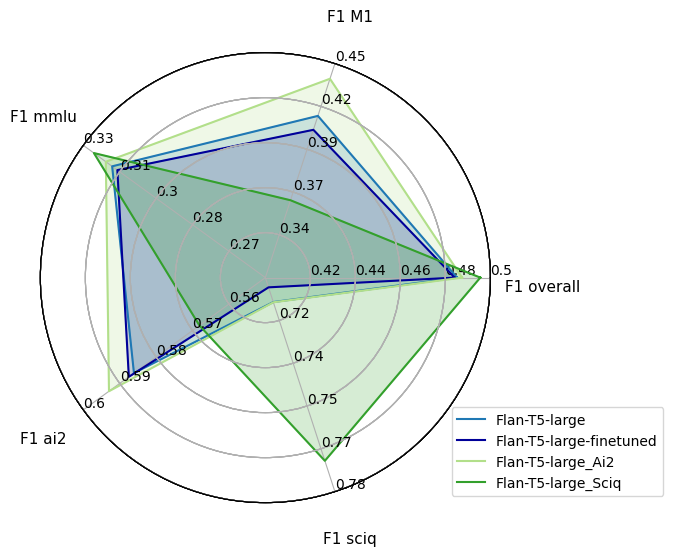

Flan-T5-large
Flan-T5-large-finetuned
Flan-T5-large_Ai2
Flan-T5-large_Sciq


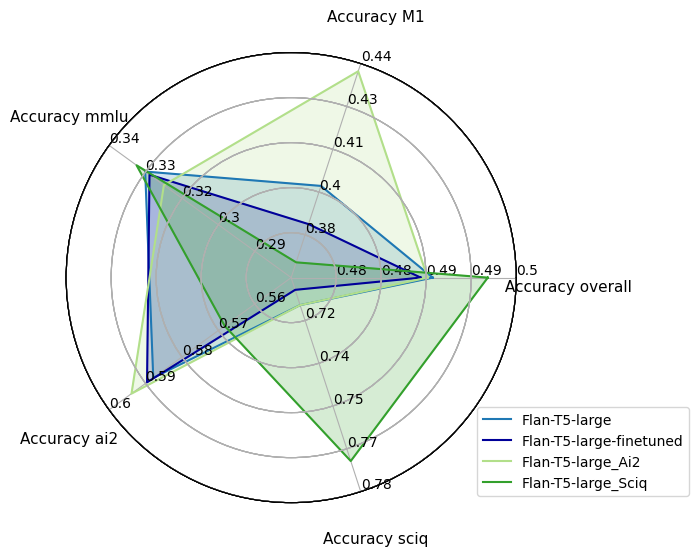

Flan-T5-large_Ai2-Sciq
Flan-T5-large_Sciq-Ai2
Flan-T5-large_Ai2-Sciq-M1


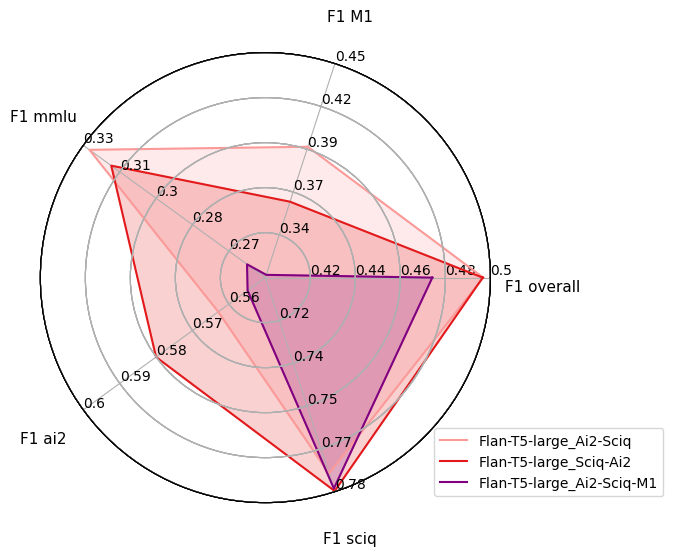

Flan-T5-large_Ai2-Sciq
Flan-T5-large_Sciq-Ai2
Flan-T5-large_Ai2-Sciq-M1


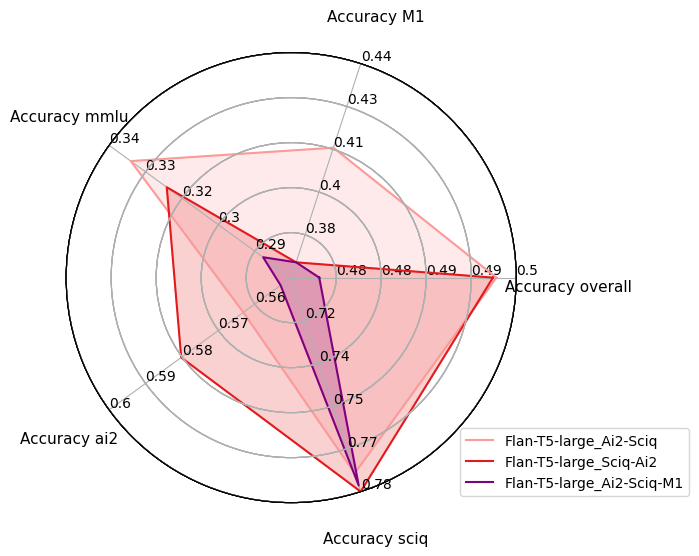

In [4]:
def _invert(x, limits):
    """inverts a value x on a scale from
    limits[0] to limits[1]"""
    return limits[1] - (x - limits[0])

def _scale_data(data, ranges):
    """scales data[1:] to ranges[0],
    inverts if the scale is reversed"""
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        # print(d, y1, y2)
        assert (y1 <= d <= y2) or (y2 <= d <= y1)
    x1, x2 = ranges[0]
    d = data[0]
    if x1 > x2:
        d = _invert(d, (x1, x2))
        x1, x2 = x2, x1
    sdata = [d]
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        if y1 > y2:
            d = _invert(d, (y1, y2))
            y1, y2 = y2, y1
        sdata.append((d-y1) / (y2-y1) 
                     * (x2 - x1) + x1)
    return sdata

class ComplexRadar():
    def __init__(self, fig, variables, ranges,
                 n_ordinate_levels=6):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True,
                label = "axes{}".format(i)) 
                for i in range(len(variables))]
        l, text = axes[0].set_thetagrids(angles, 
                                         labels=variables, fontsize=11)
        axes[0].tick_params(pad=25)
        [txt.set_rotation(angle-90) for txt, angle 
             in zip(text, angles)]
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], 
                               num=n_ordinate_levels)
            gridlabel = ["{}".format(round(x,2)) 
                         for x in grid]
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::-1] # hack to invert grid
                          # gridlabels aren't reversed
            gridlabel[0] = "" # clean up origin
            ax.set_rgrids(grid, labels=gridlabel,
                         angle=angles[i])
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(*ranges[i])
        # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
    def plot(self, data, bbox_legend, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
        self.ax.legend(loc='lower right', bbox_to_anchor=bbox_legend, fontsize = 10)
    def fill(self, data, alpha, color):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], alpha = alpha, color = color)



# example data
ranges = [(0.4,0.5), (0.31, 0.45), (0.25,0.33),  (0.55,0.6), (0.71,0.78), (0.47,0.5), (0.37,0.44),(0.28,0.34),(0.55,0.6), (0.71,0.78) ]
# plotting
fig1 = plt.figure(figsize=(5, 5))
radar = ComplexRadar(fig1, variables[:5], ranges[:5])

for i, model_name in enumerate(models_names[:4]):
    print(model_name)
    radar.plot(list(data[i,:5]), (1.4, 0), label=model_name, color = palette[model_name])
    radar.fill(list(data[i,:5]), alpha=0.2, color = palette[model_name])
plt.savefig("spider_plot_1-4_F1.png", dpi = 600,  bbox_inches="tight")
plt.show()

fig1 = plt.figure(figsize=(5, 5))
radar = ComplexRadar(fig1, variables[5:], ranges[5:])

for i, model_name in enumerate(models_names[:4]):
    print(model_name)
    radar.plot(list(data[i,5:]), (1.4, 0), label=model_name, color = palette[model_name])
    radar.fill(list(data[i,5:]), alpha=0.2, color = palette[model_name])
plt.savefig("spider_plot_1-4_accuracy.png", dpi = 600,  bbox_inches="tight")
plt.show()

fig1 = plt.figure(figsize=(5, 5))
radar = ComplexRadar(fig1, variables[:5], ranges[:5])

for i, model_name in enumerate(models_names[4:]):
    print(model_name)
    radar.plot(list(data[i+4,:5]), (1.4, 0), label=model_name, color = palette[model_name])
    radar.fill(list(data[i+4,:5]), alpha=0.2, color = palette[model_name])
plt.savefig("spider_plot_5-7_F1.png", dpi = 600,  bbox_inches="tight")
plt.show()

fig1 = plt.figure(figsize=(5, 5))
radar = ComplexRadar(fig1, variables[5:], ranges[5:])

for i, model_name in enumerate(models_names[4:]):
    print(model_name)
    radar.plot(list(data[i+4,5:]), (1.4, 0), label=model_name, color = palette[model_name])
    radar.fill(list(data[i+4,5:]), alpha=0.2, color = palette[model_name])
plt.savefig("spider_plot_5-7_accuracy.png", dpi = 600,  bbox_inches="tight")
plt.show()

In [50]:
import sys
from PIL import Image

images = [Image.open(x) for x in ['plots/spider_plot_1-4_accuracy.png', 'plots/spider_plot_1-4_F1.png', 'plots/spider_plot_5-7_accuracy.png', 'plots/spider_plot_5-7_F1.png']]
widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

new_im = Image.new('RGB', (total_width, max_height))

x_offset = 0
for im in images:
  new_im.paste(im, (x_offset,0))
  x_offset += im.size[0]

new_im.save('plots/final_spider_plot.jpg', dpi = (600,600))

In [7]:
from PIL import Image

# Open the images
images = [Image.open(x) for x in ['spider_plot_1-4_accuracy.png', 
                                   'spider_plot_1-4_F1.png', 
                                   'spider_plot_5-7_accuracy.png', 
                                   'spider_plot_5-7_F1.png']]

# Get the dimensions of each image
widths, heights = zip(*(i.size for i in images))

# Calculate the dimensions of the new image
max_dim = max(max(widths), max(heights))
new_size = (max_dim * 2, max_dim * 2 -1500)

# Create a new image with white background
new_im = Image.new('RGB', new_size, color='white')

# Paste images vertically
for i, im in enumerate(images[:2]):
    y_offset = (max_dim * i)
    if i == 1:
        y_offset -= 800
    new_im.paste(im, (0, y_offset))

# Paste images horizontally
for i, im in enumerate(images[2:]):
    x_offset = max_dim * i
    if i == 1:
        x_offset -= 800
    new_im.paste(im, (max_dim, x_offset))

# Save the final image
new_im.save('final_spider_plot.jpg', dpi=(600, 600))
